### Import Required Libraries

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

#import scikitplot as skl
sns.set()

### We will use Diabetes dataset

In [2]:
data= pd.read_csv(r"https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Here the `Outcome` column have 0 and 1, here 0 mean not diabetic and 1 mean diabetic
- Binary Classification or Multiclass classification
- This problem is `Binary Classification`
- When the problem statement is binary classification not the regression one, Then we have to use `Logistic Regression`

In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


### Check the missing values

In [5]:
# No Missing Values
data.isna().sum()  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Let's see the distribution of data:

In [7]:
all_features = [fea for fea in data.columns]
all_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

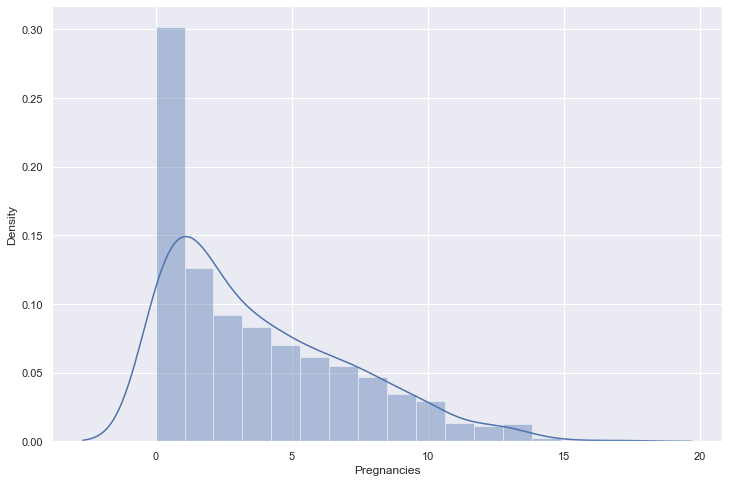

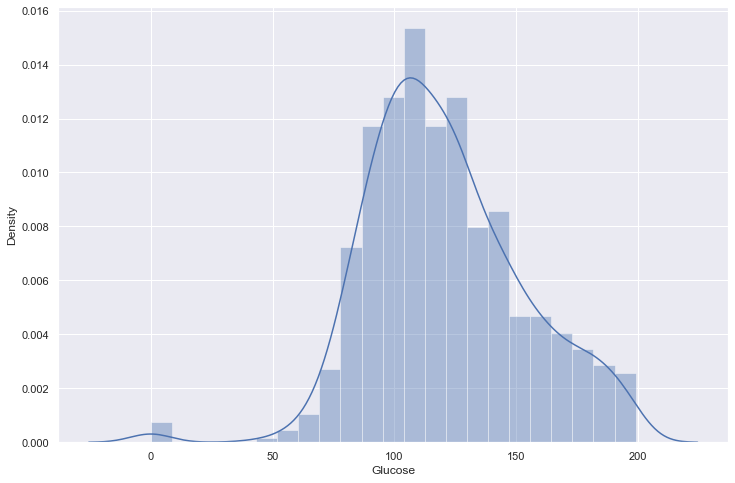

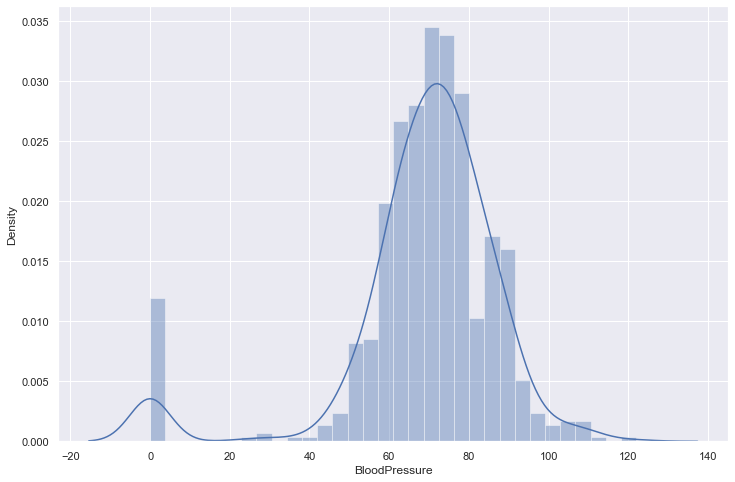

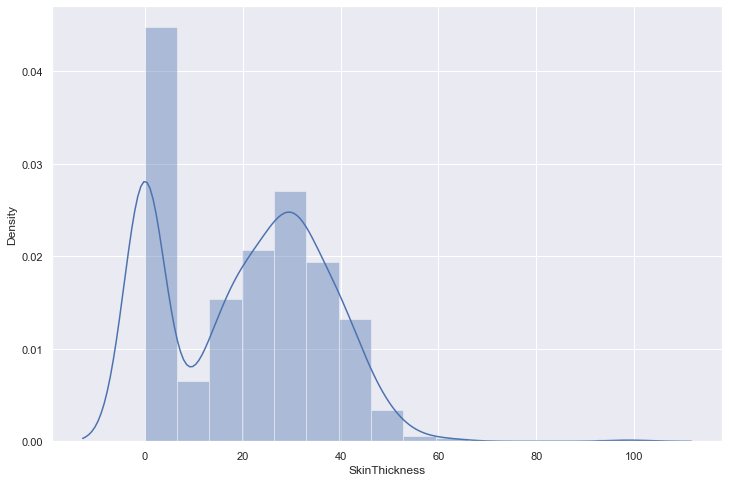

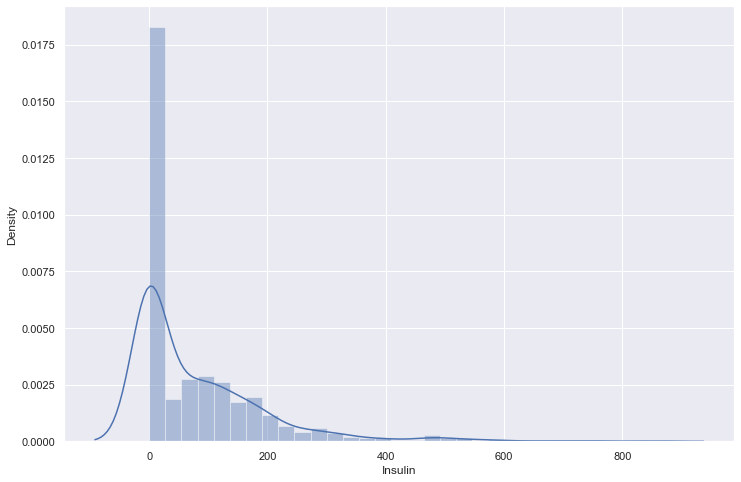

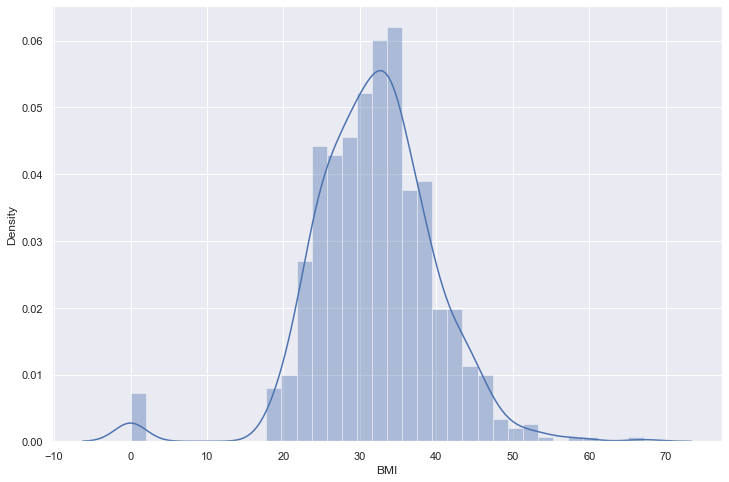

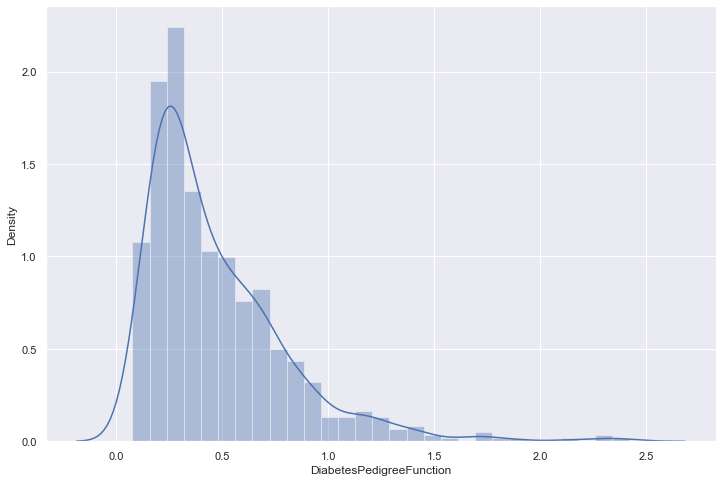

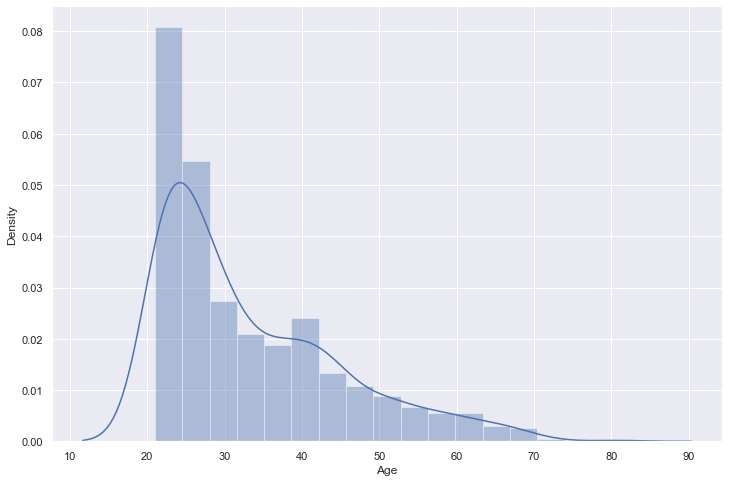

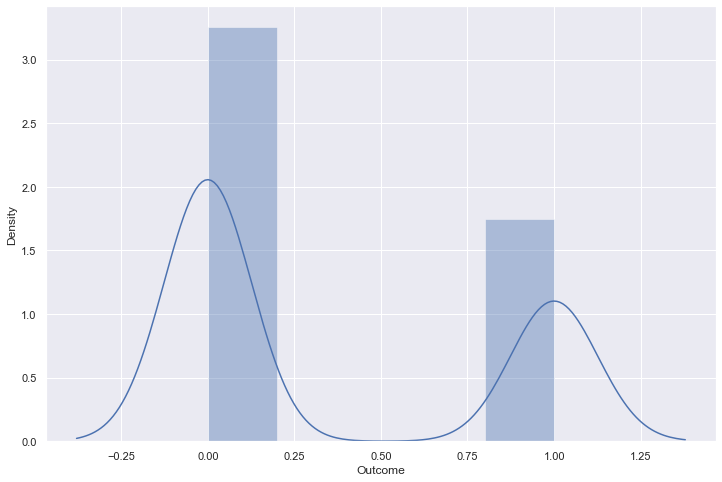

In [8]:
for i in data.columns:
    plt.figure(figsize = (12,8))
    sns.distplot(data[i])
    plt.show()

### Another way of doing this

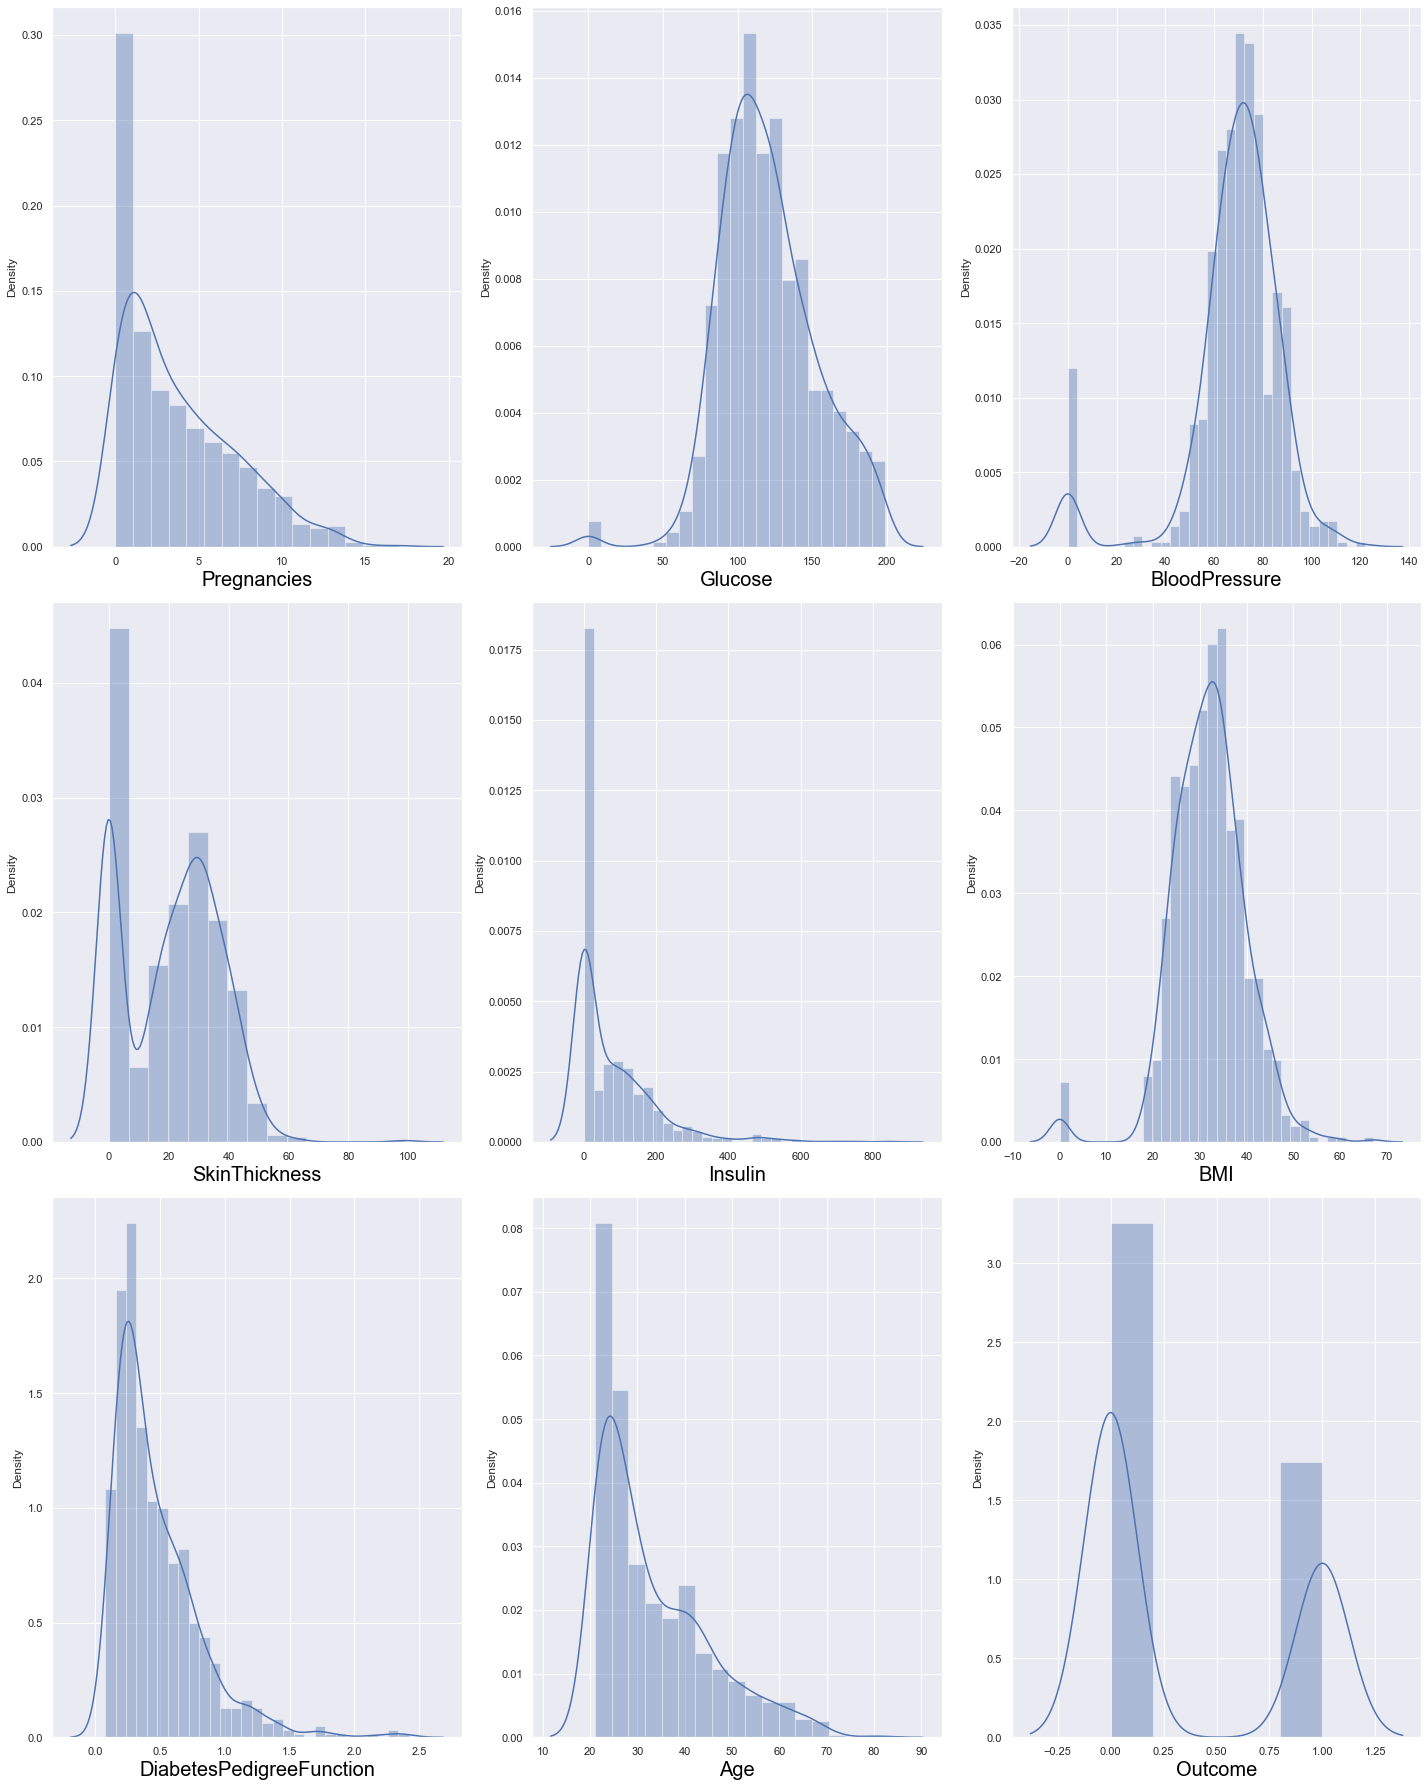

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :  # there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20, color = "black")
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

- `Blood Pressure` feature shows bimodel distribution

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Replacing zero values with mean of the respective column

In [11]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
#pregrnancies data also look skewed towards left because of some outliers, let's remove them
# q = data['Pregnancies'].quantile(0.95)
# data_cleaned = data[data['Pregnancies']<q]


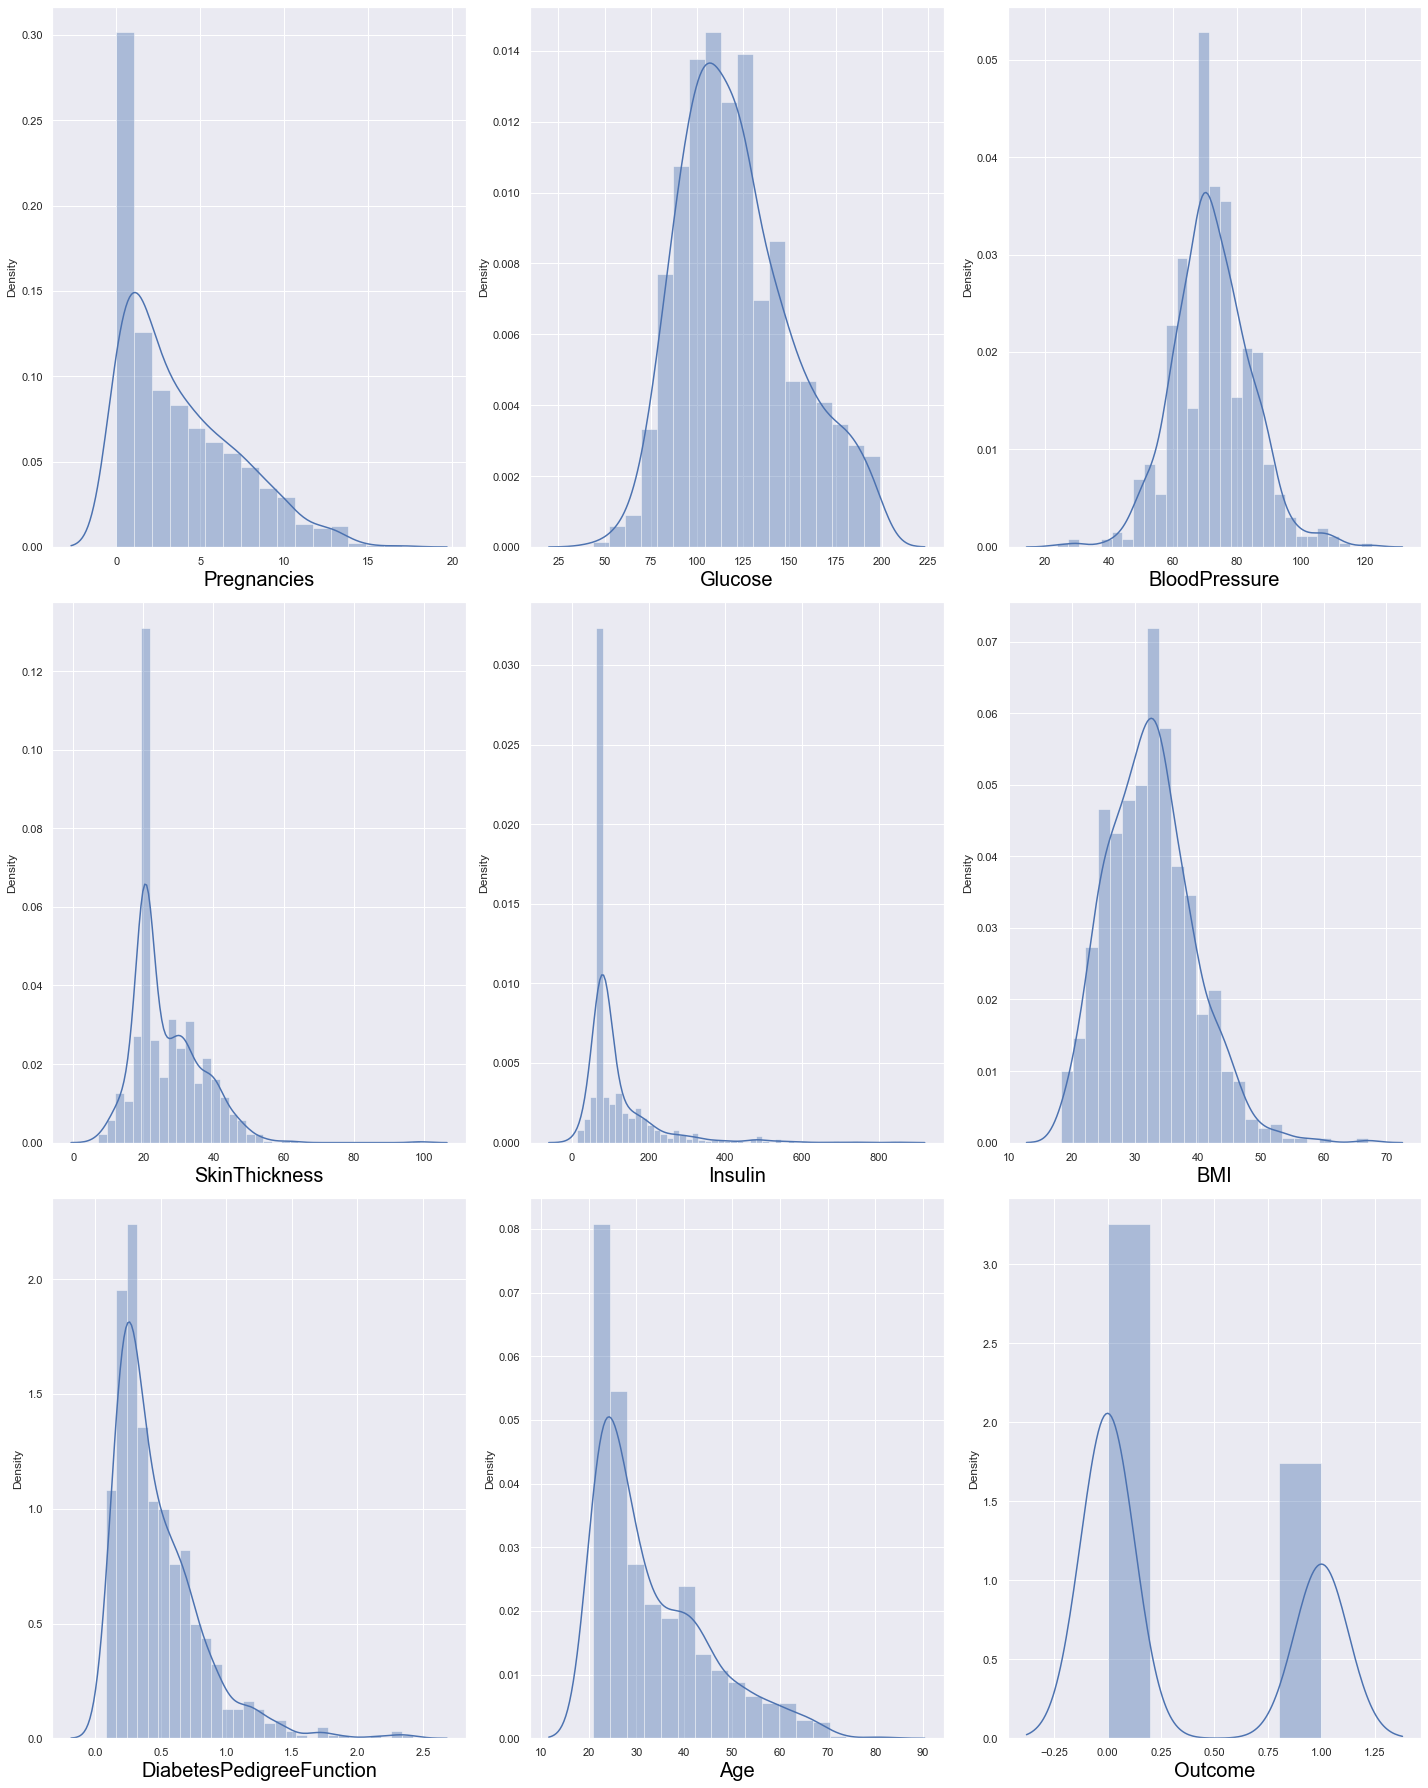

In [12]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :  # there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20, color = "black")
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, now we have deal with the 0 values and data looks better. But, there still are outliers present in some columns.
let's deal with them.

<AxesSubplot:>

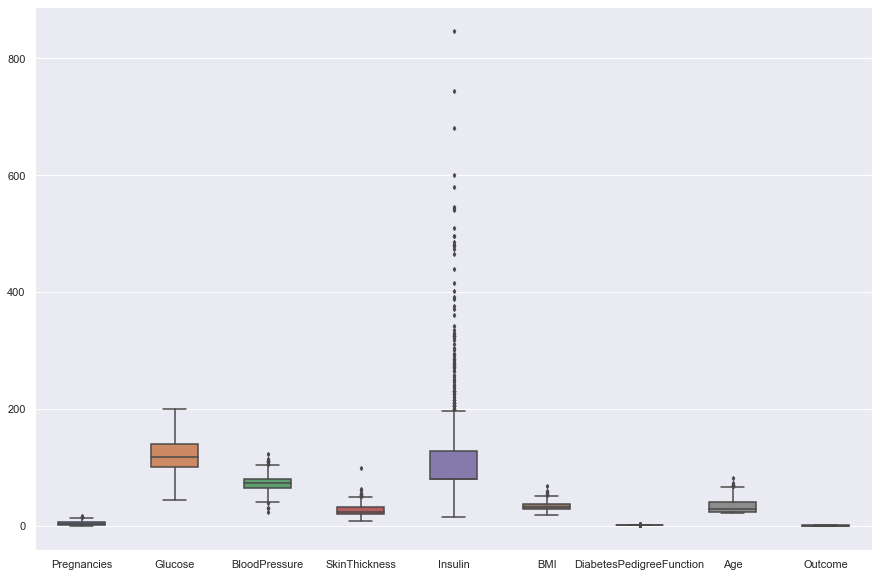

In [13]:
plt.figure(figsize = (15,10))
sns.boxplot(data = data, width = 0.5 ,fliersize=3)

#fliersize means the size of outlier dots

### Removing the outliers

<AxesSubplot:xlabel='Pregnancies'>

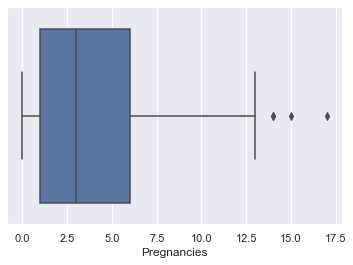

In [25]:
sns.boxplot(data = data ,x = 'Pregnancies')

In [55]:
# Find the Lower Fence and upper fence of every feature
def find_boundaries(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR*1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR*1.5)
    return upper_boundary,lower_boundary

for columns in data:
    print(columns,"---->",find_boundaries(df,columns))

Pregnancies ----> (13.5, -6.5)
Glucose ----> (202.125, 37.125)
BloodPressure ----> (107.0, 35.0)
SkinThickness ----> (80.0, -48.0)
Insulin ----> (318.125, -190.875)
BMI ----> (50.550000000000004, 13.35)
DiabetesPedigreeFunction ----> (1.2, -0.32999999999999996)
Age ----> (66.5, -1.5)
Outcome ----> (2.5, -1.5)


In [56]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI'] < q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

### Now again check the distribution

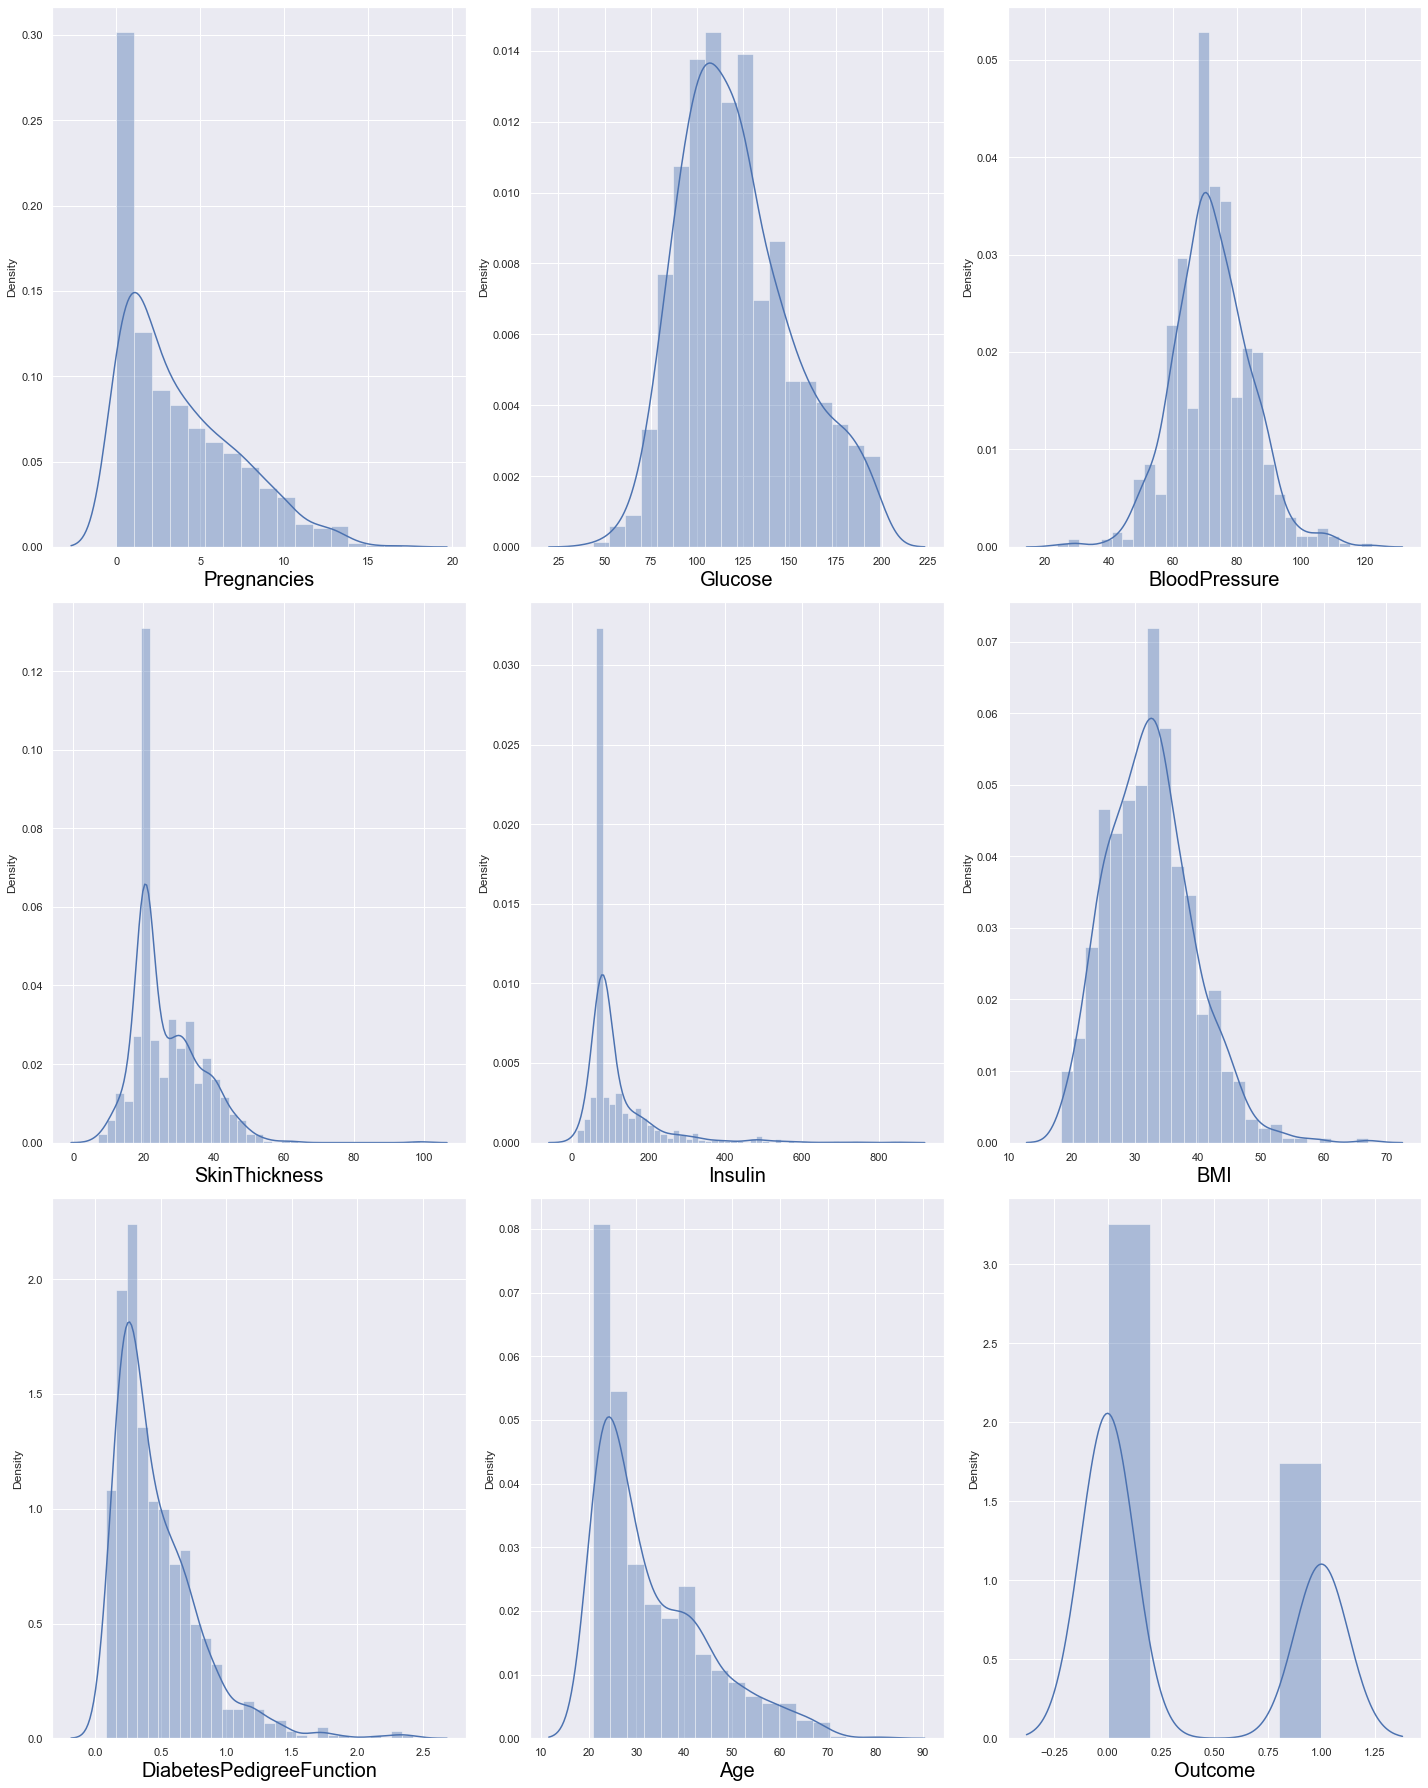

In [60]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :  # there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20, color = "black")
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

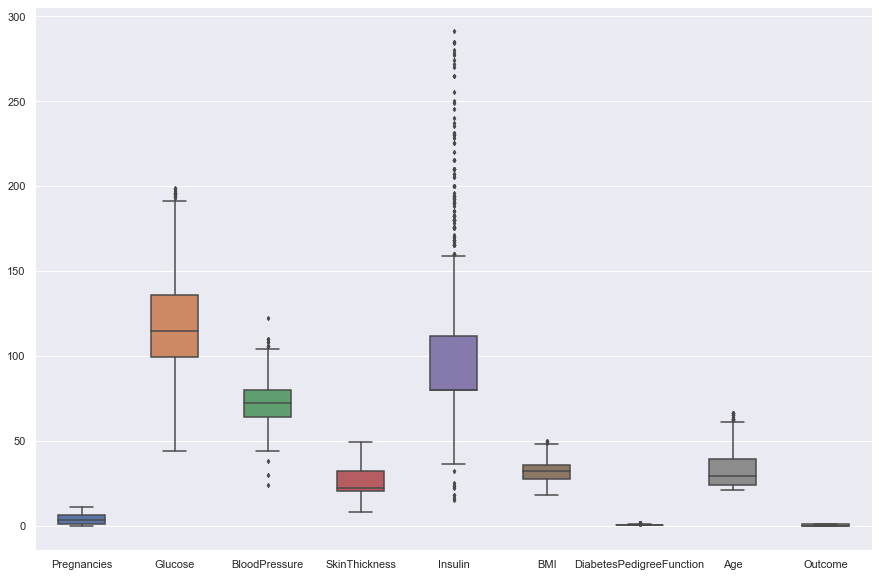

In [63]:
plt.figure(figsize = (15,10))
sns.boxplot(data = data_cleaned, width = 0.5 ,fliersize=3)

#fliersize means the size of outlier dots

Perform
- Log Transformation
- Box-Cox Transformation

The data looks much better now than before. We will start our analysis with this data now as we don't want to loose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [75]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [83]:
X1 = data_cleaned.drop(columns = ['Outcome'])
y1 = data['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

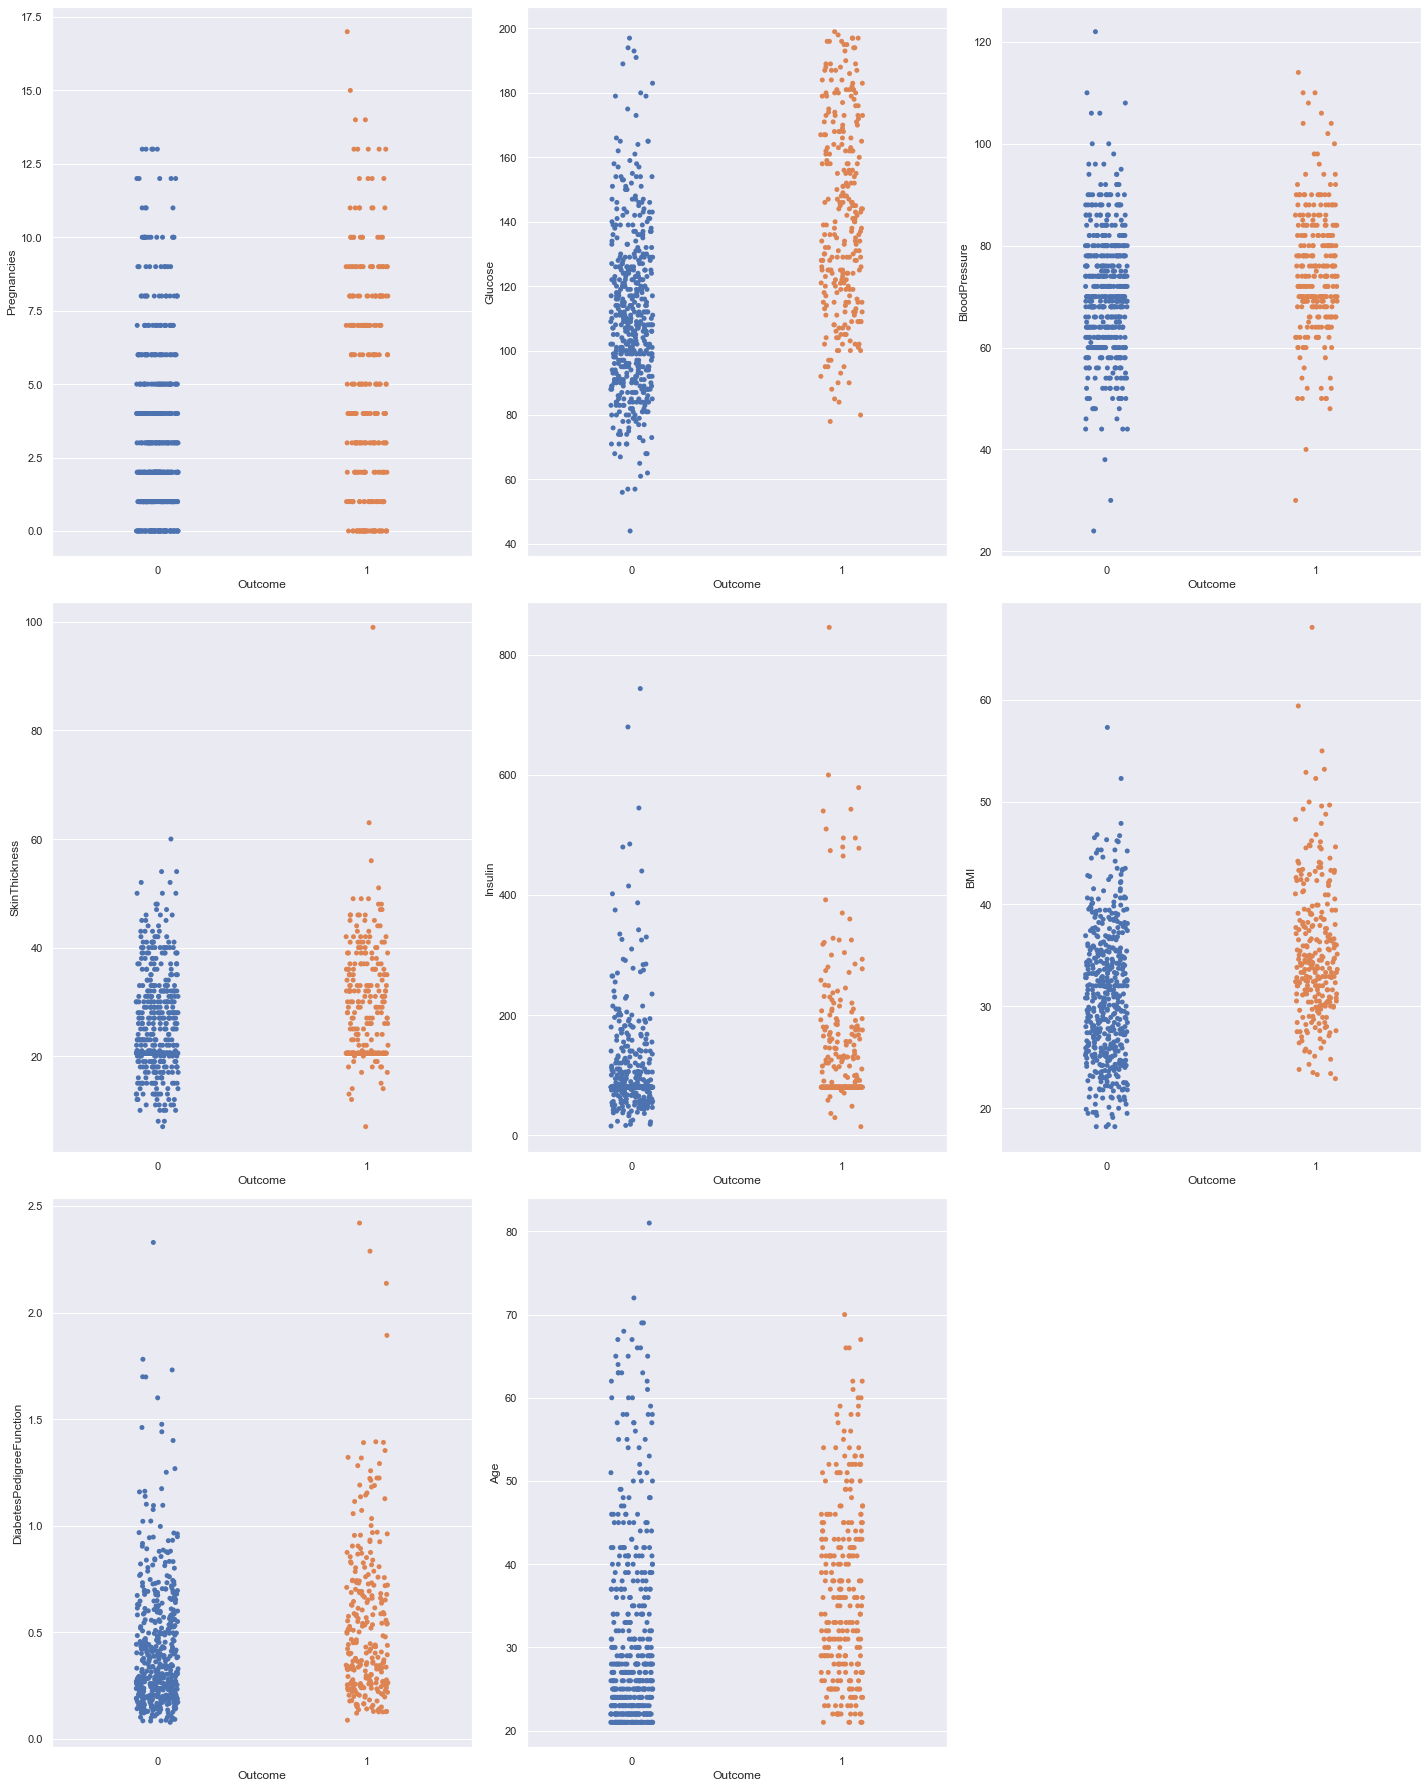

In [84]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white',)
plotnumber = 1

for column in X1:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
        #plt.xlabel(column,fontsize=20)
        plt.ylabel
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great!! Let's proceed with checking multicollineairty in the dependent variables. Before that, we should scale our data. Let's use standardscaler for that.

###  Scaling of the data

In [95]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [96]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [97]:
## Multicollinarity of the day 
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

## Will explain afterwards

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


Great, all the vif values are less than 5 and are very low. That means no multicollinearity. Now we can go ahead with fitting our data in the model. Before that let's split our data in test and training set.

### Training the model

In [100]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [101]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [103]:
## model saving or pickling our model
import pickle
# writing different model files to file
with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

### r2 score

In [113]:
log_reg.score(x_train,y_train)

0.7881944444444444

### adjusted_r2 score

In [ ]:
adj_r2(x_train,y_train,log_reg.score(x_train,y_train))

Let's see how well our model performs on the test data set.

In [104]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

### Accuracy Score

In [107]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7552083333333334

### Confusion Matrix

In [108]:
conf_Max = confusion_matrix(y_test,y_pred)
conf_Max

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [111]:
true_positive = conf_Max[0][0]
false_positive = conf_Max[0][1]
false_negative = conf_Max[1][0]
true_negative = conf_Max[1][1]
print('true_positive:',true_positive)
print('false_positive:',false_positive)
print('true_negative:',true_negative)
print('false_negative:',false_negative)

true_positive: 110
false_positive: 15
true_negative: 35
false_negative: 32


### Calculate using Theorical Formula of Accuracy, Precision, Recall, F1_Score

In [116]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7552083333333334

In [117]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.88

In [118]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7746478873239436

In [119]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8239700374531835

### Pending Concept
- ROC_AUC

In [120]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

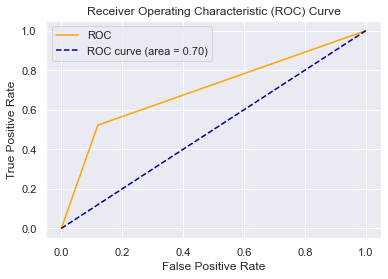

In [122]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()